In [11]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import skew

### Load dataset

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen, columns age, cabin, embarked have missing data

#### Getting total number of missing values in each column

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Imputing age with mean

In [6]:
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

#### Imputing cabin missing value with constant as it has major data missing

In [7]:
#df['Cabin'] = df['Cabin'].astype(object)
df['Cabin_filled'] = df['Cabin'].fillna('Unknown')

#### creating missing flags

In [8]:
df['Cabin_missing_flag'] = df['Cabin'].isnull().astype(int)
df['Age_missing_flag'] = df['Age'].isnull().astype(int)

In [9]:
print(df[['Age', 'Age_mean', 'Age_missing_flag']].head(10))

    Age   Age_mean  Age_missing_flag
0  22.0  22.000000                 0
1  38.0  38.000000                 0
2  26.0  26.000000                 0
3  35.0  35.000000                 0
4  35.0  35.000000                 0
5   NaN  29.699118                 1
6  54.0  54.000000                 0
7   2.0   2.000000                 0
8  27.0  27.000000                 0
9  14.0  14.000000                 0


In [10]:
print(df[['Cabin', 'Cabin_filled', 'Cabin_missing_flag']].head(10))

  Cabin Cabin_filled  Cabin_missing_flag
0   NaN      Unknown                   1
1   C85          C85                   0
2   NaN      Unknown                   1
3  C123         C123                   0
4   NaN      Unknown                   1
5   NaN      Unknown                   1
6   E46          E46                   0
7   NaN      Unknown                   1
8   NaN      Unknown                   1
9   NaN      Unknown                   1


## Check data distribution

<Axes: xlabel='Age', ylabel='Count'>

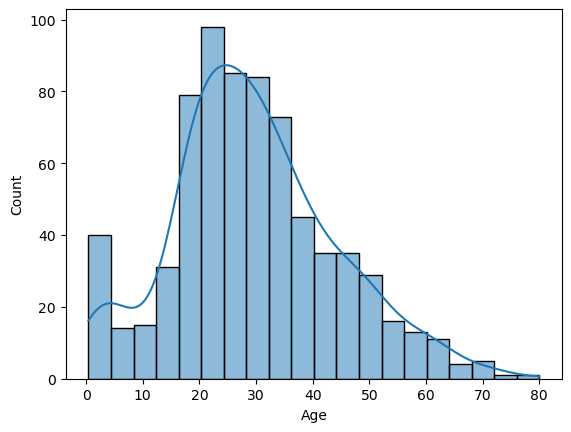

In [12]:
sns.histplot(df["Age"], kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

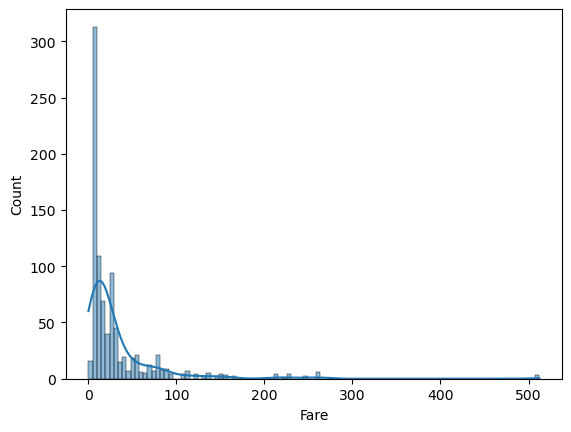

In [14]:
sns.histplot(df["Fare"], kde=True)

#### Fetching the numerical features

In [13]:
num_features = ['Age', 'Fare']
X = df[num_features]

#### Apply normalization as both the features don't follow normal distribution, data seems to be skewed

In [15]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling
X_minmax = min_max_scaler.fit_transform(X)

# Apply Standardization
X_standard = standard_scaler.fit_transform(X)

In [16]:
# Create DataFrames for comparison
df_minmax = pd.DataFrame(X_minmax, columns=[f"{col}_minmax" for col in num_features])
df_standard = pd.DataFrame(X_standard, columns=[f"{col}_standard" for col in num_features])

# Concatenate original and transformed data
result = pd.concat([X, df_minmax, df_standard], axis=1)
print(result.head())

    Age     Fare  Age_minmax  Fare_minmax  Age_standard  Fare_standard
0  22.0   7.2500    0.271174     0.014151     -0.530377      -0.502445
1  38.0  71.2833    0.472229     0.139136      0.571831       0.786845
2  26.0   7.9250    0.321438     0.015469     -0.254825      -0.488854
3  35.0  53.1000    0.434531     0.103644      0.365167       0.420730
4  35.0   8.0500    0.434531     0.015713      0.365167      -0.486337


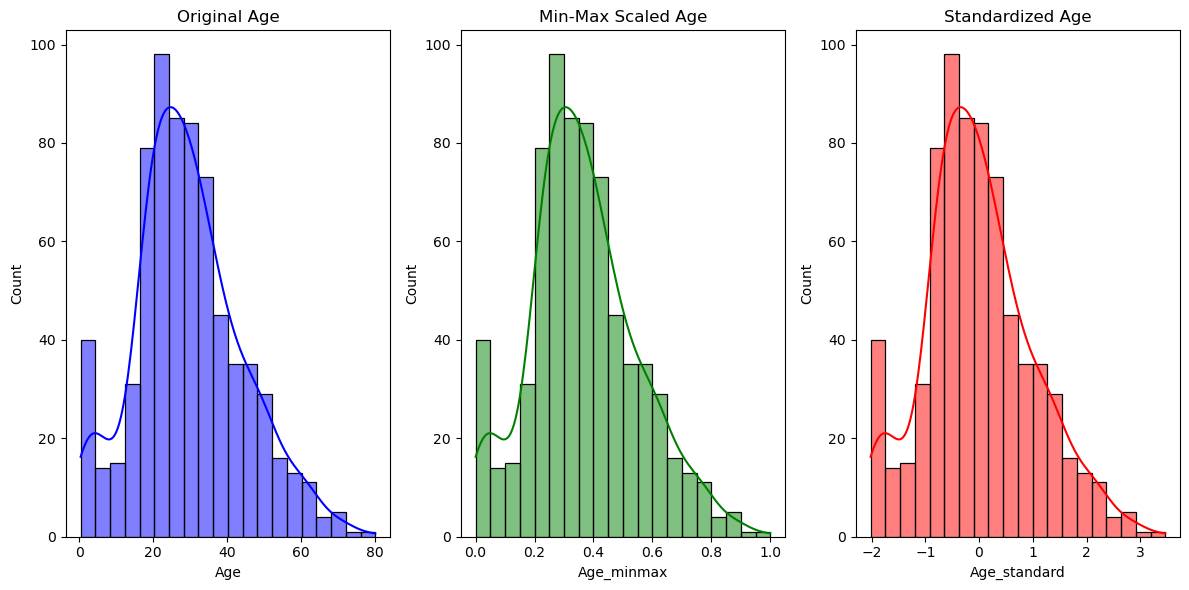

In [17]:
# Plot distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue').set_title('Original Age')
plt.subplot(1, 3, 2)
sns.histplot(df_minmax['Age_minmax'], kde=True, color='green').set_title('Min-Max Scaled Age')
plt.subplot(1, 3, 3)
sns.histplot(df_standard['Age_standard'], kde=True, color='red').set_title('Standardized Age')
plt.tight_layout()
plt.show()